In [1]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from util import *
from prim_fdr import *
from data_loader import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Test GTEx

In [ ]:
## loading GTEx data
p,x,n_full,cate_name = load_GTEx_full(verbose=True)

## testing the BH method
n_rej,t_rej=bh(p,alpha=0.1,n_sample=n_full,verbose=True)

## testing the Storey BH method
n_rej,t_rej,pi0_hat=storey_bh(p,alpha=0.1,n_sample=n_full,lamb=0.995,verbose=True)

## Load GTEx full data ##
# all hypothesis: 10623893
# filtered hypothesis: 169301
# p=0.00226011, x=[13.73583078  0.08957559  0.112      16.        ]
# p=0.00254028, x=[13.74614226  0.08957559  0.         16.        ]
# p=0.000610689, x=[13.74784609  0.08957559  0.         16.        ]
# p=0.00071358, x=[1.37478546e+01 8.95755866e-02 1.20000000e-02 1.60000000e+01]
# p=0.000228687, x=[13.74820448  0.08957559  0.209      13.        ]


## bh testing summary ##
# n_rej = 29348
# t_rej = 0.000276


## sbh summary ##
# n_rej = 29689
# t_rej = 0.000286
# pi_0 estimate = 0.975




## PrimFDR_init starts
# Learning null distribution
## initialization
Slope: w=0.5, a=[ 0.83999512 -0.03883301]
Bump 0: w=0.1, mu=[0.82232194 0.83791131], sigma=[0.11142749 0.10106856]
Bump 1: w=0.1, mu=[0.81000335 0.15064627], sigma=[0.12521512 0.09607824]
Bump 2: w=0.1, mu=[0.33364696 0.75709835], sigma=[0.17924816 0.15216771]
Bump 3: w=0.1, mu=[0.83597365 0.4821244 ], sigma=[0.10863012 0.1393249 ]
Bump 4: w=0.1, mu=[0.31474439 0.2393222 ], sigma=[0.18106174 0.15495443]


Slope: w=0.6605211304320024, a=[-0.03883301  0.15646973]
Bump 0: w=0.06421335365029106, mu=[0.85013548 0.89540158], sigma=[0.13507167 0.15546482]
Bump 1: w=0.09074936976005768, mu=[0.58299383 0.06839721], sigma=[0.29385779 0.1378565 ]
Bump 2: w=0.023135740114312086, mu=[0.58158504 0.49621229], sigma=[0.29147071 0.30175243]
Bump 3: w=0.1373842381528711, mu=[0.94664159 0.49343873], sigma=[0.11417413 0.30261078]
Bump 4: w=0.023996167890465644, mu=[0.58158504 0.49621229], sigma=[0.29147071 0.30175243]


# Learning alter

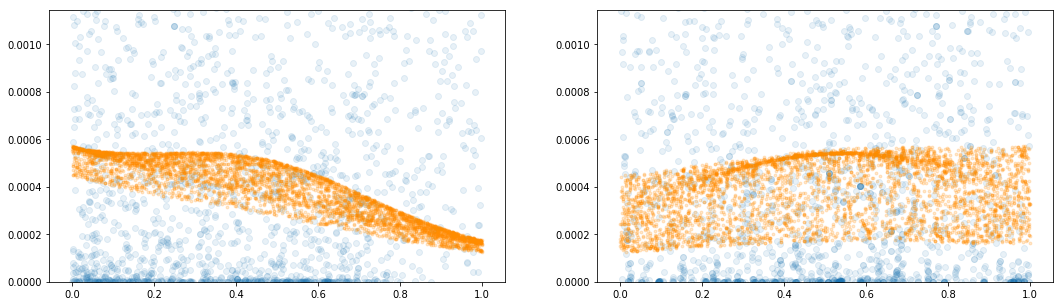

## PrimFDR_init finishes

## optimization paramter:
# n_itr=10000, n_samp=169301, lambda0=11165, lambda1=100

## optimization initialization:
# Slope: a=[-1.3084912  0.2541162], b=[-7.6326203]
# Bump 0: w=-10.03818, mu=[0.46287063 0.50202984], sigma=[0.15551992 0.16045381]
# Bump 1: w=-9.8845215, mu=[0.46287063 0.50202984], sigma=[0.15551992 0.16045381]
# Bump 2: w=-9.801707, mu=[0.46287063 0.50202984], sigma=[0.15551992 0.16045381]
# Bump 3: w=-9.78456, mu=[0.46287063 0.50202984], sigma=[0.15551992 0.16045381]
# Bump 4: w=-10.405235, mu=[0.46287063 0.50202984], sigma=[0.15551992 0.16045381]


## iteration 0
n_rej:  34879
n_rej sig:  34314.805
FD esti mirror: 3669
FD esti mirror sig: 3711.754
loss1:  [-0.20268518]
loss2:  [0.16554892]
Estimated FDP: [0.10816779]
FDP: 0.0
Slope: a=[-1.3134912   0.24911621], b=[-7.6376204]
Bump 0: w=-10.04318, mu=[0.45787066 0.5070283 ], sigma=[0.15551992 0.16045381]
Bump 1: w=-9.889522, mu=[0.45787063 0.5070285 ], sigma=[0.15551992 0.16045381]
Bump 2: w

In [ ]:
n_rej,t,_=PrimFDR(p,x[:,0:2],5,alpha=0.1,h=None,n_itr=10000,verbose=True)

In [ ]:
_=PrimFDR_cv(p,x[:,0:2],5,alpha=0.1,n_itr=10000,h=None,verbose=True)

#time start: 0.0s
#time input: 0.0195s
## testing fold 1: 0.0196s
pfdr_test start
PrimFDR start
gamma1 0.23309007606441534
0 0.9999999999999999 39071 17362 0.44437050497811675
0 0.49999999999999994 39071 17362 0.44437050497811675
0 0.24999999999999997 39071 17362 0.44437050497811675
0 0.12499999999999999 39071 17362 0.44437050497811675
0 0.06249999999999999 37672 15982 0.4242408154597579
0 0.031249999999999997 29161 10002 0.3429923527999726
0 0.015624999999999998 20158 4917 0.24392300823494395
0 0.007812499999999999 14865 2450 0.16481668348469558
0 0.0039062499999999996 11381 1158 0.10174852824883578
0 0.0019531249999999998 8966 587 0.0654695516395271
0.0009765624999999999 0.0019531249999999998 10219 897 0.08777766904785204
0.0014648437499999998 0.0019531249999999998 10792 1034 0.0958117123795404
0.0017089843749999998 0.0019531249999999998 11105 1087 0.09788383610986043
0.0018310546874999998 0.0019531249999999998 11243 1119 0.09952859557057725
0.0018920898437499998 0.001953124999999999

gamma1 1
0 429.6921052290964 39144 16917 0.43217351318209685
0 214.8460526145482 37634 15450 0.410533028644311
0 107.4230263072741 35587 13576 0.381487621884396
0 53.71151315363705 33626 11953 0.3554689823350978
0 26.855756576818525 30432 9808 0.32229232386961093
0 13.427878288409262 25366 6803 0.26819364503666326
0 6.713939144204631 19412 3939 0.20291572223366988
0 3.3569695721023156 14667 1950 0.13295152382900388
0 1.6784847860511578 11507 938 0.08151559920048666
0.8392423930255789 1.6784847860511578 13143 1442 0.10971619873697025
0.8392423930255789 1.2588635895383684 12418 1196 0.09631180544371075
1.0490529912819737 1.2588635895383684 12782 1307 0.10225316851822876
1.0490529912819737 1.153958290410171 12589 1243 0.0987369926125983
1.1015056408460724 1.153958290410171 12669 1276 0.10071828873628542
1.1015056408460724 1.1277319656281217 12630 1258 0.09960411718131433
1.114618803237097 1.1277319656281217 12652 1267 0.10014226999683845
1.114618803237097 1.1211753844326093 12641 1263 0.0